# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [1]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [2]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int32
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [3]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [4]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [5]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [6]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [7]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [8]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [9]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [10]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [11]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('img/moon.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('img/moon.png')

Array can be displayed as an image using Matplotlib module. Here a short example:

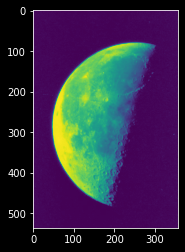

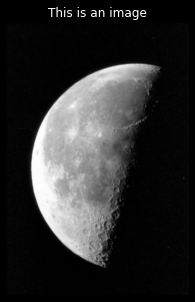

In [12]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


(537, 358) (537, 358) (358, 537)


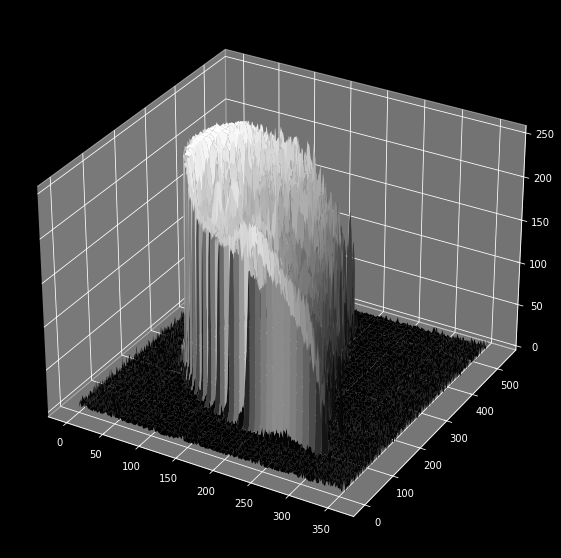

In [13]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(projection='3d'))
x = np.arange(0, myimage.shape[0], 1)
y = np.arange(0, myimage.shape[1], 1)
x, y = np.meshgrid(y,x)
print(x.shape,y.shape,myimage.T.shape)
ax.plot_surface(x,y,myimage, cmap='gray')
plt.show()

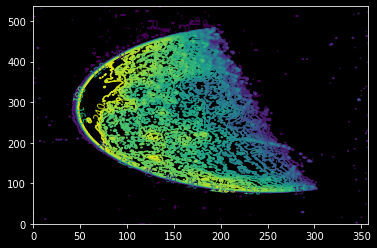

In [14]:
cs = plt.contour(x, y, myimage, 20, cmap = 'viridis')
plt.clabel(cs, inline=True, fontsize=10)

def plotContour(myimage, NoLabels=True):
    x = np.arange(0, myimage.shape[0])
    y = np.arange(0, myimage.shape[1])
    # x, y = np.meshgrid(y,x[::-1])
    x, y = np.meshgrid(y,x)
    cs = plt.contour(x, y, myimage, 20, cmap = 'viridis')
    if not NoLabels:
        plt.clabel(cs, inline=True, fontsize=10)
    plt.colorbar()
    plt.show()

See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html#sphx-glr-gallery-images-contours-and-fields-image-demo-py). 

## Exercice 1
In this exercice, we work with image `img/moon.png`. If possible give two solutions : one with loops (for, while, ...) and one without loops. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [15]:
from PIL import Image
import numpy as np

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    return np.array(Image.open(fname))

openImage("img/moon.png")

array([[ 1,  3,  7, ...,  8, 16,  8],
       [ 3,  7,  3, ...,  4, 11, 12],
       [ 6,  4,  6, ...,  7,  2,  3],
       ...,
       [ 4,  8,  8, ...,  6,  4,  8],
       [ 4,  8,  8, ...,  4,  6,  6],
       [ 2,  3,  3, ...,  6,  9,  9]], dtype=uint8)

2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [16]:
def countPixels(I,k):
    """ Array*int -> int"""
    return np.where((I==k),1,0).sum()

def countPixels2(I,k):
    """ Array*int -> int"""
    return np.sum(I==k)

def countPixels3(I,k):
    """ Array*int -> int"""
    return I[I==k].size

print(countPixels(openImage("img/moon.png"),9))
print(countPixels(np.arange(12),2))

2178
1


3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [17]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    ICopy = I.copy()
    for i in range (len(ICopy)):
        if(ICopy[i] == k1):
            ICopy[i] = k2
    return ICopy

def replacePixels2(I,k1,k2):
    """ Array*int*int -> Array """
    return np.vectorize(lambda x : k2 if x == k1 else x)(I.copy())

print(replacePixels(np.arange(12),5,9))
print(replacePixels2(np.arange(12),5,9))
    

[ 0  1  2  3  4  9  6  7  8  9 10 11]
[ 0  1  2  3  4  9  6  7  8  9 10 11]


4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

[10.         10.34482759 10.68965517 11.03448276 11.37931034 11.72413793
 12.06896552 12.4137931  12.75862069 13.10344828 13.44827586 13.79310345
 14.13793103 14.48275862 14.82758621 15.17241379 15.51724138 15.86206897
 16.20689655 16.55172414 16.89655172 17.24137931 17.5862069  17.93103448
 18.27586207 18.62068966 18.96551724 19.31034483 19.65517241 20.        ]
0 253
50.0 100.0


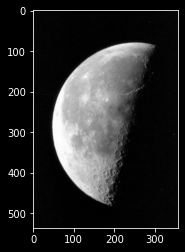

In [18]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    ICopy = I.copy()
    kmax = ICopy.max()
    kmin = ICopy.min()
    #avec boucle
    """for i in range (len(ICopy)):
        ICopy[i] = k1 + (((k2-k1)/(kmax-kmin))*(ICopy[i]-kmin))
    return ICopy"""
    #sans boucle
    return k1 + (((k2-k1)/(kmax-kmin))*(ICopy-kmin))

print(normalizeImage(np.arange(30),10,20))
moon = openImage("img/moon.png")
moon_norm = normalizeImage(moon,50,100)
plt.imshow(moon_norm)

print(moon.min(),moon.max())
print(moon_norm.min(),moon_norm.max())
plt.show()

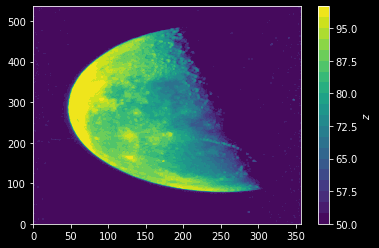

In [19]:
plt.contourf(x, y, moon_norm, 20, cmap='viridis')
plt.colorbar(label=('$z$'))
plt.show()

5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

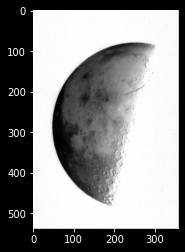

In [20]:
def inverteImage(I):
    """ Array -> Array """
    return 255 - I
moon_inv = inverteImage(moon)

plt.imshow(moon_inv)
plt.show()

    

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [21]:
def computeHistogram(I):
    """ Array -> list[int] """
    n,m = I.shape
    covariance = I.max()-I.min()+1
    r = 1
    while(2**r<covariance):
        r+=1
    H = np.zeros(2**r)
    for i in range(n):
        for j in range(m):
            H[int(I[i,j])]+=1
    return H

def computeHistogram2(I):
    """ Array -> list[int] """
    Histogram = np.zeros(256)
    for p in I.ravel(): Histogram[p] += 1
    return Histogram

def computeHistogram3(I):
    """ Array -> list[int] """
    return np.bincount(I.ravel(), minlength=256)

# print (computeHistogram(moon_inv))
# print (computeHistogram(moon))

# use comments to answer to a verbal question
# histograms don't use the locatization of the points in space 

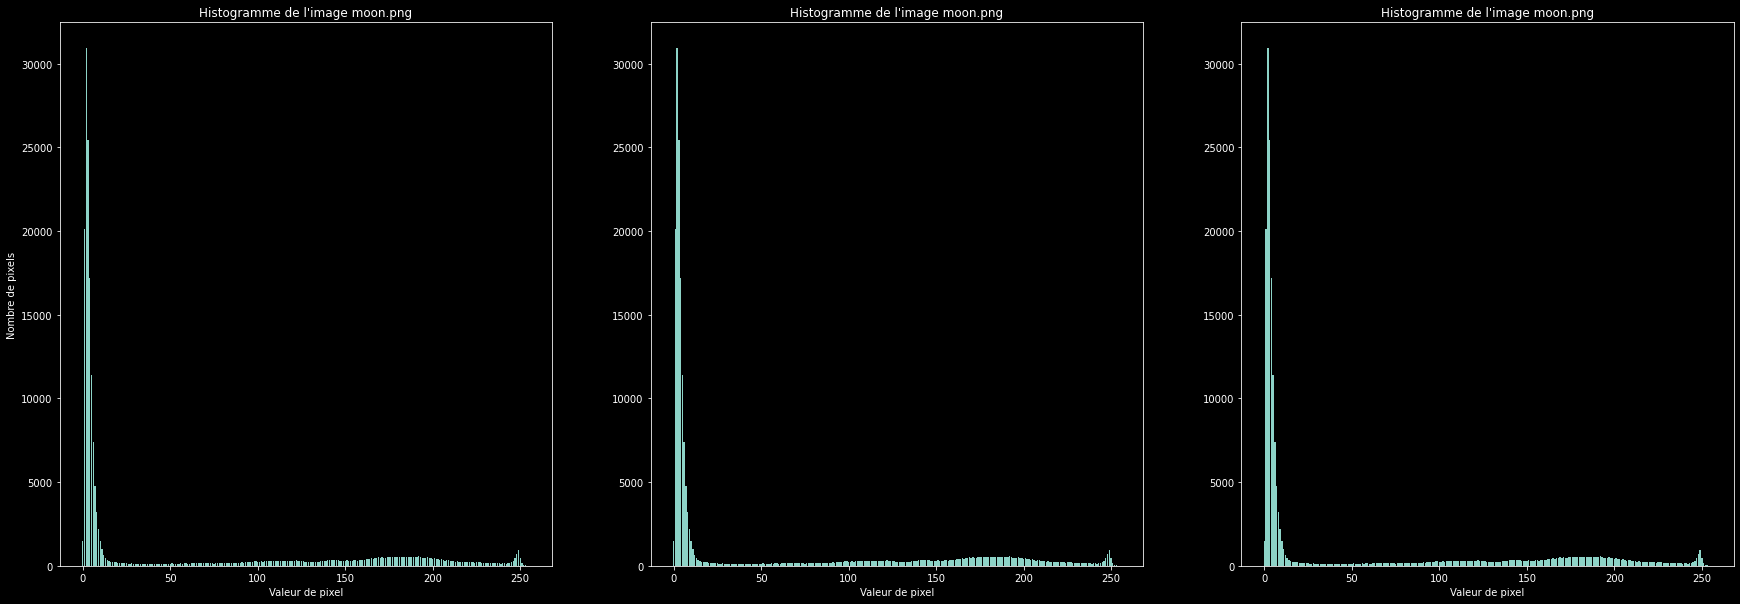

In [22]:
fig , axes = plt.subplots(1,3,figsize=(30, 10))

ax = axes[0]
ax.bar(np.arange(256),computeHistogram(moon))
ax.set_title("Histogramme de l'image moon.png")
ax.set_xlabel("Valeur de pixel")
ax.set_ylabel("Nombre de pixels")

ax = axes[1]
ax.bar(np.arange(256),computeHistogram2(moon))
ax.set_title("Histogramme de l'image moon.png")
ax.set_xlabel("Valeur de pixel")

ax = axes[2]
ax.bar(np.arange(256),computeHistogram3(moon))
ax.set_title("Histogramme de l'image moon.png")
ax.set_xlabel("Valeur de pixel")
plt.show()

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

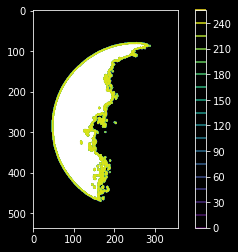

In [23]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    J = I.copy()
    n,m = I.shape
    for i in range(n):
        for j in range(m):
            if(J[i,j]<s):
                J[i,j]=0
            else:
                J[i,j]=255
    return J

moon_threshold = thresholdImage(moon,150)
plt.imshow(moon_threshold)
plotContour(moon_threshold)

8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

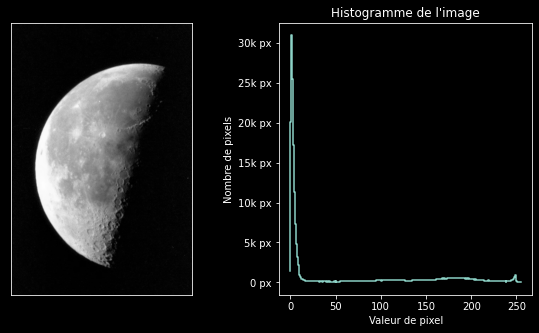

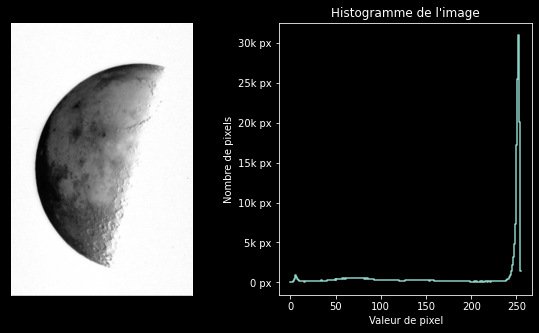

In [91]:
import matplotlib.pyplot as plt

def KTicksString(x, pos):
    if  x >= 1e6:
        s = f"{int(x*1e-6)}M px"
    elif x >= 1e3:
        s = f"{int(x*1e-3)}k px"
    else:
        s = f"{int(x)} px"
    return s

## your code start below

def Histogram(I):
    """Array -> void """
    # Affichage de l'image
    fig , axes = plt.subplots(1,2,figsize=(10, 5))
    ax = axes[0]
    ax.imshow(I,vmin=0,vmax=255,cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    # Affichage de l'histogramme
    values = computeHistogram(I)

    ax = axes[1]
    # ax.bar(np.arange(values.size),values)
    # On peux utiliser Bar pour afficher l'histogramme mais il n'est pas très lisible
    #  et ne montre pas toutes les informations pour un nombre de bars élevé 
    ax.step(np.arange(values.size),values)
    ax.set_title("Histogramme de l'image")
    ax.set_xlabel("Valeur de pixel")
    ax.set_ylabel("Nombre de pixels")
    ax.yaxis.set_major_formatter(KTicksString)
    plt.show()
    
moon = openImage("img/moon.png")
moon_inv = inverteImage(moon)

Histogram(moon)
Histogram(moon_inv)


9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

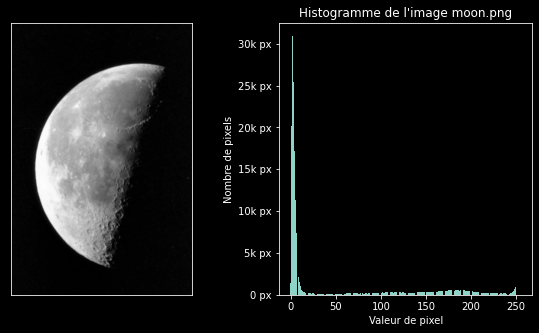

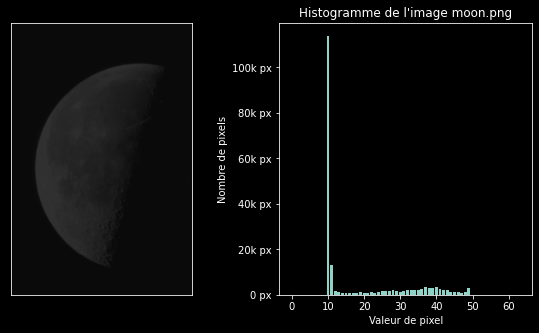

In [57]:
Histogram(moon)
moon_norm = normalizeImage(moon,10,50)

Histogram(moon_norm)



10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

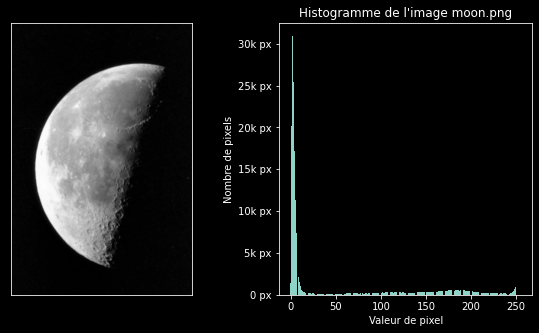

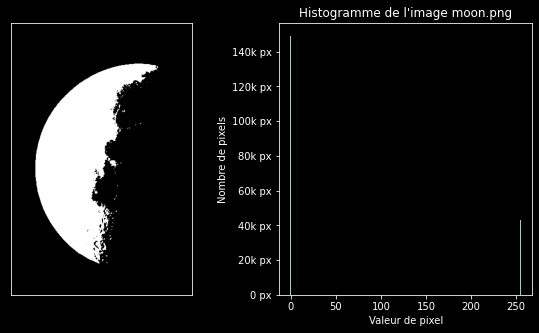

In [59]:
Histogram(moon)
moon_threshold = thresholdImage(moon,127)
Histogram(moon_threshold)


## Exercice 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 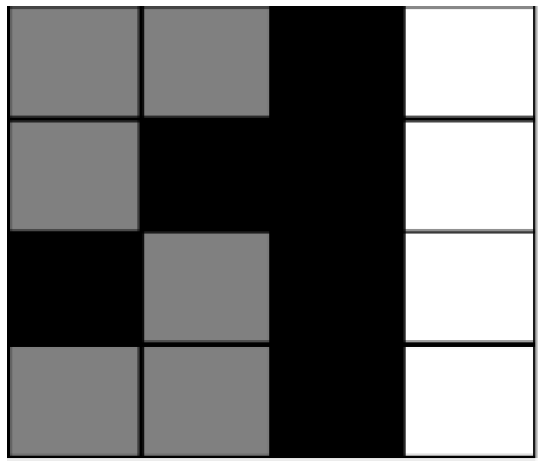 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

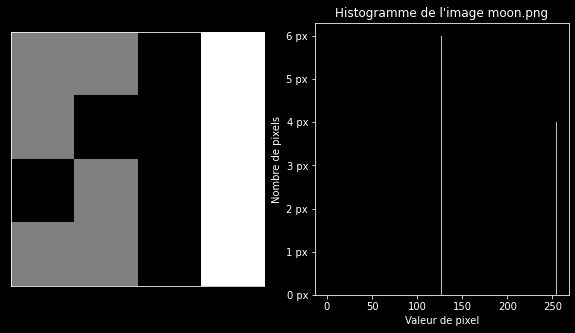

In [76]:
I=np.array([[127, 127, 0, 255],
    [127, 0, 0, 255],
    [0, 127, 0, 255],
    [127, 127, 0, 255]])
Histogram(I)

2. We want to generate a matrix having random values. Functions `rand()` and `randn()` from  `numpy.matlib` module generate array of given shape with random values following respectively a uniform distribution on $[0,1[$ and a normal distribution. Create an array of shape 512 by 512 having **integer** elements following an uniform distribution in the set $\{0,1,\cdots,255\}$ . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histogramms. Discuss the results.

Normal Distribution :


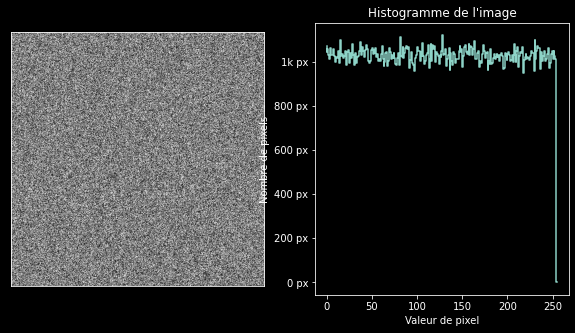

Gaussian Distribution :


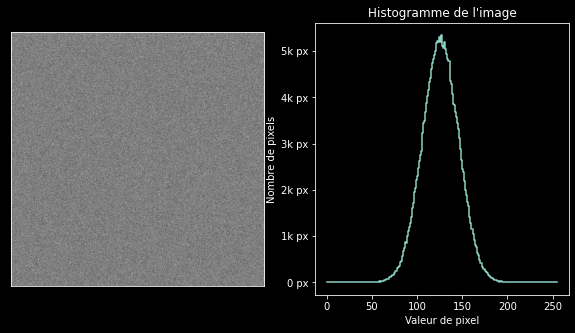

In [88]:
import numpy.matlib

Random = np.matlib.rand((512, 512))*255
m,n = Random.shape
for i in range (m):
    for j in range(n):
        Random[i,j] = int(Random[i,j])
print("Normal Distribution :")
Histogram(Random)

Random = np.matlib.randn((512, 512)) * 20 + 127
m,n = Random.shape
for i in range (m):
    for j in range(n):
        Random[i,j] = int(Random[i,j])
        
print("Gaussian Distribution :")
Histogram(Random)



## Exercice 3: image manipulation
In this exercice, we work with image `img/pout.png`. 

1. Read and display this image

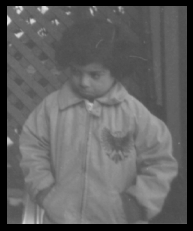

In [93]:
girl = openImage("img/pout.png")
plt.imshow(girl,vmin=0,vmax=255)
plt.axis('off')
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

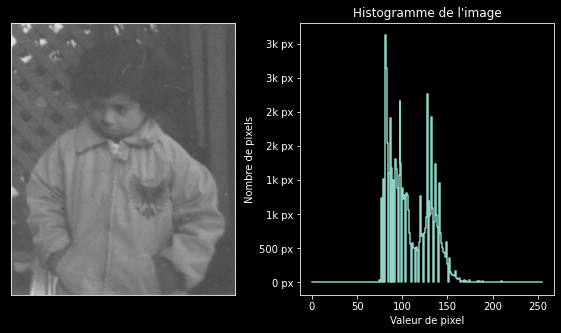

In [92]:
Histogram(girl)
# We can see that we're missing a lot of white and black, the extrema are really close to eatch other.

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

Histogram Cumulatif :


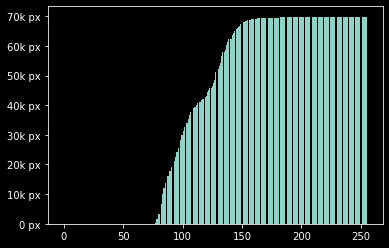

Before histogram Equalization :


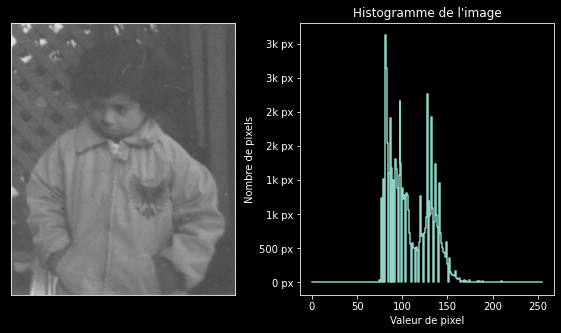

After histogram Equalization :


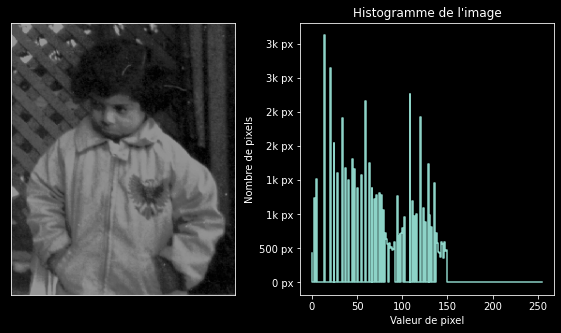

In [98]:
def histogramEqualization(I,h):
    """ Array * (list[int] -> Array """
    HistoCumul = np.zeros(h.size)
    tmp = 0
    for i in range(h.size):
        HistoCumul[i] = h[i] + tmp
        tmp += h[i]
    
    n,m = I.shape
    L = I.max()-I.min()+1
    equaliz = ((L-1)/(n*m))*HistoCumul[I]
        
    print("Histogram Cumulatif :")
    fig, ax = plt.subplots()
    ax.bar(np.arange(HistoCumul.size),HistoCumul)
    ax.yaxis.set_major_formatter(KTicksString)
    plt.show()
    
    print("Before histogram Equalization :")
    Histogram(I)
    
    print("After histogram Equalization :")
    Histogram(equaliz)

histogramEqualization(girl,computeHistogram(girl))
